# Project - Titanic

The goal of this project is to predict the survivors of titanic using the given passenger information. The following is the structure of this project:

1. Gather data
2. Data preprocessing
  - Fill missing data
  - Feature engineering
3. Choosing models
4. Hyperparamter tuning
5. Ensemble learning
6. Result and discussion

## Downloaded the data (train.csv and test.csv files) from the [Kaggle Titanic challenge](https://www.kaggle.com/c/titanic)


Upload the dataset. Move them to the `datasets/titanic` directory.

In [ ]:
from google.colab import files
import pandas as pd
import io
import os

train_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('train.csv') #remove the file created during upload that is in the root folder
train_data = pd.read_csv(io.StringIO(train_data_dict['train.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

test_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('test.csv') #remove the file created during upload that is in the root folder
test_data = pd.read_csv(io.StringIO(test_data_dict['test.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

titanic_dir_path = os.path.join("datasets", "titanic")
os.makedirs(titanic_dir_path, exist_ok=True) #create the folder
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data.to_csv(train_csv_path, index=False) #save the data to csv file
test_data.to_csv(test_csv_path, index=False) #save the data to csv file

Saving train.csv to train.csv


Saving test.csv to test.csv


In [ ]:
import pandas as pd
import os

titanic_dir_path = os.path.join("datasets", "titanic")
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)


## Understanding the dataset

### 1. Features:

- Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- Pclass: passenger class.
- Name, Sex, Age: self-explanatory
- SibSp: how many siblings & spouses of the passenger aboard the Titanic.
- Parch: how many children & parents of the passenger aboard the Titanic.
- Ticket: ticket id
- Fare: price paid (in pounds)
- Cabin: passenger's cabin number
- Embarked: where the passenger embarked the Titanic


### 2. Taking a look at info(), we can see:

-'Survided' feature is missing in the test data.
- Most of the 'Cabin' feature is null
- 'Age' feature is missing 177 elements

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 3. Using histogram to check the distribution.

Insights:
- Age is mostly between 20 and 30
- Fare is mostly has low values (less than 20 dollars)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f690f9976d0>,
      dtype=object)

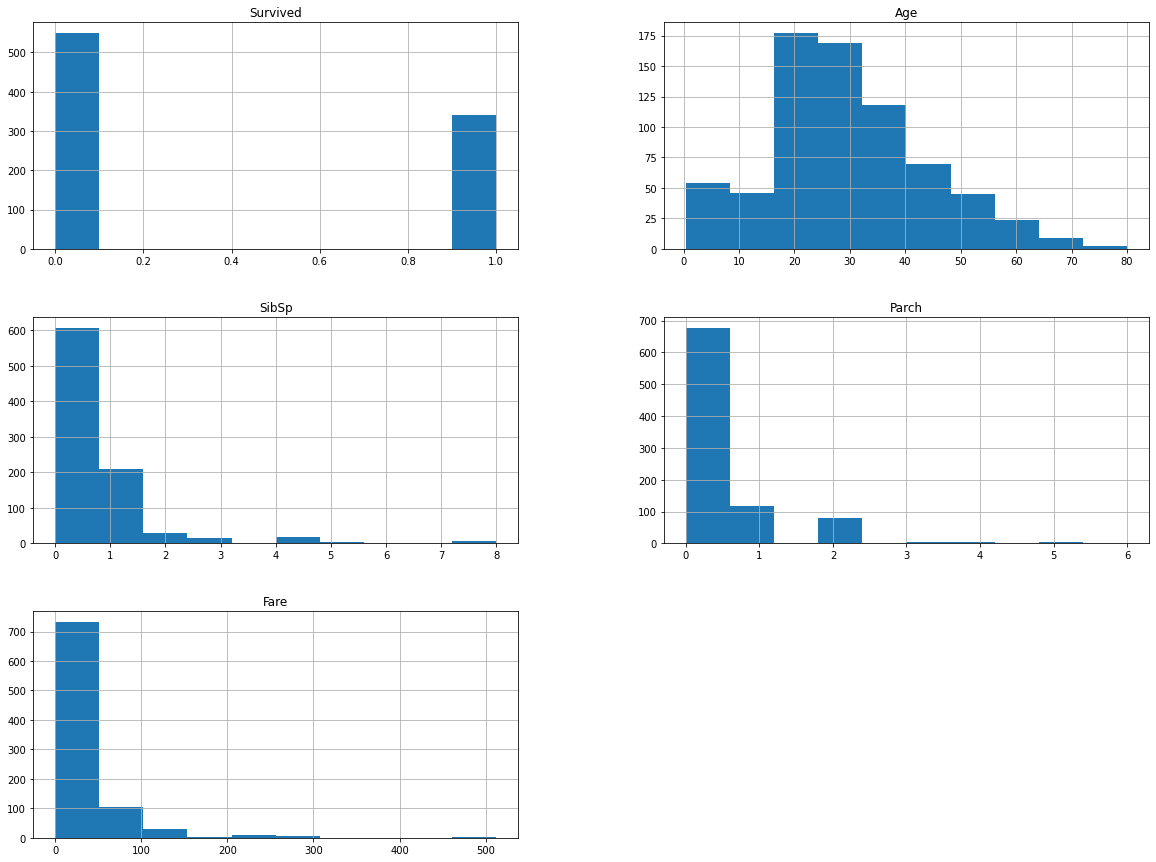

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
hist_data = train_data[["Survived", "Sex", "Age", "SibSp", "Parch", "Fare"]]
hist_data.hist(figsize=(20,15))
#hist_data.Fare[train_data["Fare"] < 20].hist(bins=20,figsize=(20,15))


## Data preprocessing

1. Fill missing data
2. Feature engineering


### Fill missing data

Create a new 'all_data' frame by appending test data to train data.


In [ ]:
all_data = train_data.append(test_data) # important
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


There are some duplicate indices. Reset them.

In [ ]:
all_data.index.value_counts()>1  # see that some index values exists more than 1

0       True
314     True
286     True
285     True
284     True
       ...  
571    False
570    False
569    False
568    False
890    False
Length: 891, dtype: bool

In [ ]:
all_data.reset_index(inplace = True, drop = True) # reset the inde inplace and drop the created extra 'index' column

These features are missing data. I will fill them up while minimizing bias.

- Age
- Fare
- Cabin
- Embarked

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Fill missing values of 'Cabin' field with the 'NA' value.

In [ ]:
all_data.Cabin = all_data.Cabin.fillna('NA')
all_data.Cabin.fillna('NA', inplace=True)

Fill missing values of 'Age' field with the median age of the passenger class and sex.


In [ ]:
# Fill in missing age information based on the median age for its class and sex.
all_data['Age'] = all_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))

Fill missing values of 'Embarked' field with the most frequently seen 'Embarked' value.

In [ ]:
# Fill in missing Embarked based on the most frequent Embarked
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

Fill missing values of 'Fare' field with the median fare of the passenger class and embarked location.

In [ ]:
# Fill in missing fare based on its class and embarked place
all_data['Fare'] = all_data.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x : x.fillna(x.median()))

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Feature Engineering

Create a new feature 'Family_Size' using `SibSp` and `Parch` features. Include the person too.
'

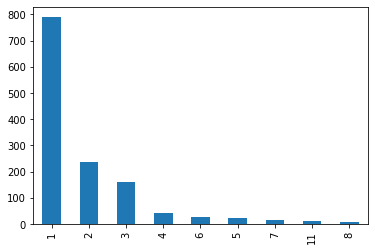

In [ ]:
# Create a new feature by adding SibSp, Parch and the person herself.
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1

all_data['Family_Size'].value_counts().plot(kind='bar')

The bar chart shows that a a family size under 5 has a higher chance of survival.

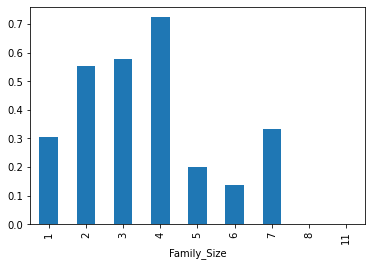

In [ ]:
all_data[['Family_Size','Survived']].groupby('Family_Size')['Survived'].mean().plot(kind='bar')

Create a new feature `Fare_Category` using qcut. It appears that higher fare correlates to higher survival rate.

In [ ]:
results_categorical = pd.qcut(all_data['Fare'],5)
all_data['Fare_Category'] = pd.Series(results_categorical).astype(str)
all_data['Fare_Category'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare_Category, dtype: int64

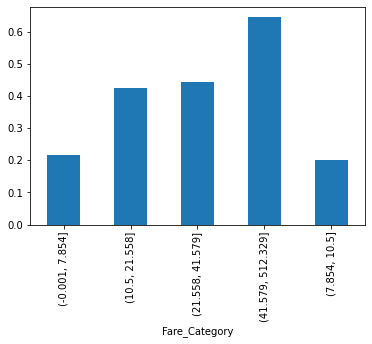

In [ ]:
all_data[['Fare_Category','Survived']].groupby('Fare_Category')['Survived'].mean().plot(kind='bar')

Create a new feature `Age_Category`. It appears that middle age (16-32) and very old age (64+) has the lower survival rate.



In [ ]:
results_categorical = pd.cut(all_data['Age'].astype(int),5)
all_data['Age_Category'] = pd.Series(results_categorical).astype(str)
all_data['Age_Category'].value_counts()

(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age_Category, dtype: int64

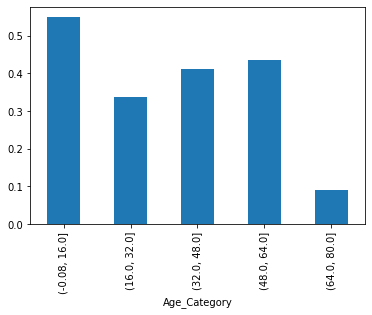

In [ ]:
all_data[['Age_Category','Survived']].groupby('Age_Category')['Survived'].mean().plot(kind='bar')

#### Encoders

Now, I need to encode object categories to number so the machine learning model can understand them. I will use Label Encoder and One Hot Encoder.

Using LabelEncoder, create the 'Sex_Numeric' based on the values of the 'Sex' attribute.

In [ ]:
from sklearn.preprocessing import LabelEncoder
all_data['Sex_Numeric'] = LabelEncoder().fit_transform(all_data['Sex'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          1309 non-null   object 
 11  Embarked       1309 non-null   object 
 12  Family_Size    1309 non-null   int64  
 13  Fare_Category  1309 non-null   object 
 14  Age_Category   1309 non-null   object 
 15  Sex_Numeric    1309 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 163.8+ KB


A utiliy function for transforming categorical data to one-hot data:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def encode_category_to_numeric(feature,data_frame):
  encoded_feat = OneHotEncoder().fit_transform(data_frame[feature].values.reshape(-1,1)).toarray()
  #number_unique = data_frame[feature].nunique()
  unique_values = data_frame[feature].unique()
  sorted_unique_value = np.sort(unique_values)
  cols = ['{}_{}'.format(feature,value) for value in sorted_unique_value]
  encoded_data = pd.DataFrame(encoded_feat, columns=cols)
  return encoded_data

One-hot encode 'Embarked'.

In [ ]:
encoded_data = encode_category_to_numeric('Embarked',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
encoded_data.info()
all_data.info()
all_data.head()

One-hot encode 'Embarked'. 'Fare_Category'.

In [ ]:
encoded_data = encode_category_to_numeric('Fare_Category',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
encoded_data.info()
all_data.info()
all_data.head()

One-hot encode 'Age_Category'.

In [ ]:
encoded_data = encode_category_to_numeric('Age_Category',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
encoded_data.info()
all_data.info()

One-hot encode 'PClass'.

In [ ]:
# encode
encoded_data = encode_category_to_numeric('Pclass',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)

# output to check the result
encoded_data.info()
all_data.info()
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass_1  1309 non-null   float64
 1   Pclass_2  1309 non-null   float64
 2   Pclass_3  1309 non-null   float64
dtypes: float64(3)
memory usage: 30.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3   Name                             1309 non-null   object 
 4   Sex                              1309 non-null   object 
 5   Age                              1309 non-null   float64
 6   SibSp                            1309 non-null   i

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]","Age_Category_(32.0, 48.0]","Age_Category_(48.0, 64.0]","Age_Category_(64.0, 80.0]",Pclass_1,Pclass_2,Pclass_3
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Convert 'Sex_Numeric' and 'Family_Size' fields to 'float16'

In [ ]:
all_data = all_data.astype({'Sex_Numeric': 'float16'})
all_data = all_data.astype({'Family_Size': 'float16'})

#### Correlation matrix
Show the values for 'Survived' column of the corr_matrix in descending order.

In [ ]:
corr_matrix = all_data.corr()
corr_matrix.sort_values(by=['Survived'], ascending=False, inplace=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_Numeric,Embarked_C,...,"Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]","Age_Category_(32.0, 48.0]","Age_Category_(48.0, 64.0]","Age_Category_(64.0, 80.0]",Pclass_1,Pclass_2,Pclass_3
Survived,-0.005007,1.000000,-0.338481,-0.058635,-0.035322,0.081629,0.257307,0.016639,-0.543351,0.168240,...,0.263007,-0.191707,0.121485,-0.106821,0.032801,0.030350,-0.067344,0.285904,0.093349,-0.322308
Pclass_1,0.026495,0.285904,-0.884911,0.434773,-0.034256,-0.013033,0.600115,-0.029656,-0.107371,0.325722,...,0.694277,-0.281522,-0.128983,-0.349646,0.293696,0.291286,0.085637,1.000000,-0.296526,-0.622172
"Fare_Category_(41.579, 512.329]",0.021562,0.263007,-0.616763,0.229912,0.226143,0.177918,0.715122,0.245992,-0.171396,0.253915,...,1.000000,-0.244290,-0.053855,-0.189235,0.131016,0.182949,0.046950,0.694277,-0.200972,-0.435976
Fare,0.031029,0.257307,-0.558740,0.198711,0.160388,0.221668,1.000000,0.226653,-0.185744,0.286405,...,0.715122,-0.234452,-0.006540,-0.214889,0.137490,0.173843,0.027705,0.600115,-0.121168,-0.419921
Embarked_C,0.048101,0.168240,-0.269658,0.082854,-0.048396,-0.008635,0.286405,-0.036553,-0.066564,1.000000,...,0.253915,-0.203069,-0.010211,-0.069159,0.037092,0.077071,0.006066,0.325722,-0.134675,-0.171430
"Age_Category_(-0.08, 16.0]",-0.046825,0.121485,0.127844,-0.545366,0.331953,0.307018,-0.006540,0.386151,-0.085774,-0.010211,...,-0.053855,-0.096110,1.000000,-0.392387,-0.185732,-0.100243,-0.033822,-0.128983,0.010144,0.103287
Pclass_2,0.022714,0.093349,-0.182413,0.008966,-0.052419,-0.010057,-0.121168,-0.039976,-0.028862,-0.134675,...,-0.200972,-0.084821,0.010144,-0.008066,-0.001462,0.010758,-0.014164,-0.296526,1.000000,-0.563180
Parch,0.008942,0.081629,0.018322,-0.134239,0.373587,1.000000,0.221668,0.792296,-0.213125,-0.008635,...,0.177918,-0.198817,0.307018,-0.200974,0.022900,-0.002631,-0.026760,-0.013033,-0.010057,0.019521
"Fare_Category_(21.558, 41.579]",-0.014435,0.062529,-0.231870,0.065825,0.178576,0.215268,-0.042452,0.235118,-0.038360,-0.007800,...,-0.250223,-0.247812,0.155996,-0.239325,0.119120,0.073461,0.007060,0.130578,0.199791,-0.276761
"Fare_Category_(10.5, 21.558]",-0.001128,0.043153,0.128526,-0.122612,0.001468,0.015200,-0.172353,0.009273,-0.077431,-0.007615,...,-0.244290,-0.241935,0.113877,-0.001925,-0.023849,-0.068228,-0.049263,-0.281522,0.330757,-0.027551


The correlation ranges from around 0.28 to -0.54. I think I can drop 10 features with the lowest absolute value of correlation, leaving me with 14 most relevant features (besides Survived).

In [ ]:
# sort 'Survived' feature by absolute value
temp_matrix = corr_matrix[['Survived']].apply(np.abs).sort_values(by=['Survived'], ascending=False)
# and drop the last 10
temp_matrix.drop(temp_matrix.tail(10).index, inplace=True)

# now get the important data using the remaining features
important_data = all_data[temp_matrix.index]
important_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Survived                         891 non-null    float64
 1   Sex_Numeric                      1309 non-null   float16
 2   Pclass                           1309 non-null   int64  
 3   Pclass_3                         1309 non-null   float64
 4   Pclass_1                         1309 non-null   float64
 5   Fare_Category_(41.579, 512.329]  1309 non-null   float64
 6   Fare                             1309 non-null   float64
 7   Fare_Category_(7.854, 10.5]      1309 non-null   float64
 8   Fare_Category_(-0.001, 7.854]    1309 non-null   float64
 9   Embarked_C                       1309 non-null   float64
 10  Embarked_S                       1309 non-null   float64
 11  Age_Category_(-0.08, 16.0]       1309 non-null   float64
 12  Age_Category_(16.0, 

### Prepare training and testing data.

X_train: dataframe with except for 'survived'. The rows that has 'survived' filled  will be train, otherwise test.

Y_train: dataframe with only targets for X-train (survived feature)

X_test: Like X-train, but the rows without 'survived' filled




In [ ]:
# Non-NaN Survived rows will be used for training
# drop Survived column because it's for Y_train
X_train = important_data[important_data['Survived'].notnull()].drop('Survived', axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sex_Numeric                      891 non-null    float16
 1   Pclass                           891 non-null    int64  
 2   Pclass_3                         891 non-null    float64
 3   Pclass_1                         891 non-null    float64
 4   Fare_Category_(41.579, 512.329]  891 non-null    float64
 5   Fare                             891 non-null    float64
 6   Fare_Category_(7.854, 10.5]      891 non-null    float64
 7   Fare_Category_(-0.001, 7.854]    891 non-null    float64
 8   Embarked_C                       891 non-null    float64
 9   Embarked_S                       891 non-null    float64
 10  Age_Category_(-0.08, 16.0]       891 non-null    float64
 11  Age_Category_(16.0, 32.0]        891 non-null    float64
 12  Pclass_2              

In [ ]:
# Get the non-NaN Survived rows in a 1-D array
# data type converted to int so the training model can learn easier
Y_train = important_data['Survived'].dropna().astype(int)
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# NaN Survived rows will be used for testing
X_test = important_data[important_data['Survived'].isna()].drop('Survived', axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sex_Numeric                      418 non-null    float16
 1   Pclass                           418 non-null    int64  
 2   Pclass_3                         418 non-null    float64
 3   Pclass_1                         418 non-null    float64
 4   Fare_Category_(41.579, 512.329]  418 non-null    float64
 5   Fare                             418 non-null    float64
 6   Fare_Category_(7.854, 10.5]      418 non-null    float64
 7   Fare_Category_(-0.001, 7.854]    418 non-null    float64
 8   Embarked_C                       418 non-null    float64
 9   Embarked_S                       418 non-null    float64
 10  Age_Category_(-0.08, 16.0]       418 non-null    float64
 11  Age_Category_(16.0, 32.0]        418 non-null    float64
 12  Pclass_2           

Use StandardScaler of Scikit Learn to scale the 'Fare' feature of both X_train and X_test. Overwrite the 'Fare' column.

In [ ]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

# transform data
X_train['Fare'] = scaler.fit_transform(X_train[['Fare']])
X_test['Fare'] = scaler.fit_transform(X_test[['Fare']])


## Models, hyperparameter tuning, and ensemble learning


### Models

For each of the algorithms listed below, I will use Scikit-Learn's cross-validation feature to measure the performance and print out the mean and std for each algorithm.

1. Stochastic Gradient Descent (SGD)
2. LogisticRegression
3. Support Vector Machine (kernel='linear' parameter)
4. Support Vector Machine (kernel = 'rbf' parameter)
5. DecisionTreeClassifier
6. RandomForestClassifier
7. ExtraTreesClassifier
8. AdaBoostClassifier
9. GradientBoostingClassifier
10. XGBoost

I will use the following parameters:

* Set the scoring parameter of cross-validation to 'f1'
* Use the default cv = 5 parameter of cross-validation
* Use random_state = 42 for initializing model algorithms


In [ ]:
# First, remove the ] from the feature name why switching it to ),
# since XGBoost doesn't like it.
X_train.columns = X_train.columns.str.replace(r"[]]", ")", regex=True)
X_test.columns = X_test.columns.str.replace(r"[]]", ")", regex=True)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# to keep the result consistent for multiple tries
the_random_state = 42

models = [] # append all models or predictive models
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

# Stochastic Gradient Descent (SGD)
models.append(SGDClassifier(random_state = the_random_state))

# Logistic Regression
models.append(LogisticRegression(random_state = the_random_state))

# Support Vector Machine (kernel='linear' parameter)
models.append(SVC(kernel = 'linear', random_state = the_random_state))

# Support Vector Machine (kernel='rbf' parameter)
models.append(SVC(kernel = 'rbf', random_state = the_random_state))

# DecisionTreeClassifier
models.append(DecisionTreeClassifier(random_state = the_random_state))

# RandomForestClassifier
models.append(RandomForestClassifier(random_state = the_random_state))

# ExtraTreesClassifier
models.append(ExtraTreesClassifier(random_state = the_random_state))

# AdaBoostClassifier
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state = the_random_state)))

# GradientBoostingClassifier
models.append(GradientBoostingClassifier(random_state = the_random_state))

# XGBoost
models.append(XGBClassifier(random_state = the_random_state))

In [ ]:
# fit and test
for model in models :
  cv_results.append(cross_val_score(model, X_train, Y_train, scoring="f1", cv=5))

# keep the score
for cv_result in cv_results:
  cv_means.append(cv_result.mean())
  cv_std.append(cv_result.std())

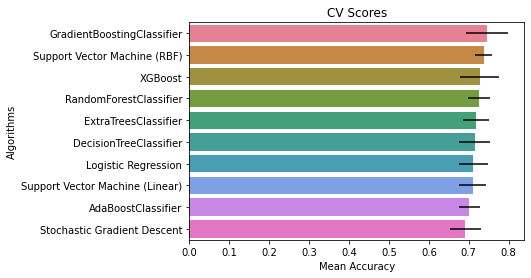

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a dataframe to show the result
cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "Stochastic Gradient Descent",
                     "Logistic Regression",
                     "Support Vector Machine (Linear)",
                     "Support Vector Machine (RBF)",
                     "DecisionTreeClassifier",
                     "RandomForestClassifier",
                     "ExtraTreesClassifier",
                     "AdaBoostClassifier",
                     "GradientBoostingClassifier",
                     "XGBoost"
                     ]
    })

# sort the result in descending order
cv_frame.sort_values(by=['CrossValMeans'], ascending=False, inplace=True)

# plot the result (mean) and the std will be the error bar
cv_plot = sns.barplot(x="CrossValMeans",y="Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_frame['CrossValErrors']})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")


In [ ]:
# display the result dataframe too
cv_frame

,CrossValMeans,CrossValErrors,Algorithms
8,0.746333,0.052286,GradientBoostingClassifier
3,0.737288,0.020952,Support Vector Machine (RBF)
9,0.727414,0.048552,XGBoost
5,0.724844,0.027706,RandomForestClassifier
6,0.718064,0.033734,ExtraTreesClassifier
4,0.715055,0.038707,DecisionTreeClassifier
1,0.710921,0.036351,Logistic Regression
2,0.709268,0.034996,Support Vector Machine (Linear)
7,0.701494,0.026903,AdaBoostClassifier
0,0.691672,0.038631,Stochastic Gradient Descent


Mean and std scores for each algorithm

Algorithm: Mean Score - Std



In [ ]:
for i in range(0,10):
  print(str(i+1) + ". " + cv_frame['Algorithms'][i]
        + " : " + str(cv_frame['CrossValMeans'][i])[:6]
        + " - " + str(cv_frame['CrossValErrors'][i])[:6])

1. Stochastic Gradient Descent : 0.6916 - 0.0386
2. Logistic Regression : 0.7109 - 0.0363
3. Support Vector Machine (Linear) : 0.7092 - 0.0349
4. Support Vector Machine (RBF) : 0.7372 - 0.0209
5. DecisionTreeClassifier : 0.7150 - 0.0387
6. RandomForestClassifier : 0.7248 - 0.0277
7. ExtraTreesClassifier : 0.7180 - 0.0337
8. AdaBoostClassifier : 0.7014 - 0.0269
9. GradientBoostingClassifier : 0.7463 - 0.0522
10. XGBoost : 0.7274 - 0.0485


### Hyperparamter tuning

I looks like Gradient boost performs the best with default parameters. However, I can make it better with hyperparameter tuning using GridSearchCV. I will check the top 3 best performing models with the following hyperparameters:

n_estimators = [300, 400, 500]

learning_rate = [0.3, 0.1, 0.05]

max_features = [1, 0.5, 0.3]

subsample = [1, 0.5, 0.3]

max_samples = [1, 0.5, 0.3]

bootstrap = [True, False]




Gradient Boost

In [ ]:
# Gradient Boost hyperparameters
models[8].get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

new_scoring_parameter = 'f1'
new_cv = 10

gbc = GradientBoostingClassifier(random_state = the_random_state)

gb_param_grid = {
'n_estimators':[300, 400, 500],
'learning_rate':[0.3, 0.1, 0.05],
'max_features':[1, 0.5, 0.3],
'subsample':[1, 0.5, 0.3]
}

gsGBC = GridSearchCV(gbc, param_grid = gb_param_grid, cv=new_cv,
scoring=new_scoring_parameter)

gsGBC.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.3, 0.1, 0.05],
                         'max_features': [1, 0.5, 0.3],
                         'n_estimators': [300, 400, 500],
                         'subsample': [1, 0.5, 0.3]},
             scoring='f1')

In [ ]:
gsGBC.best_score_

0.7676098258492601

In [ ]:
gsGBC.best_params_

{'learning_rate': 0.1,
 'max_features': 0.3,
 'n_estimators': 400,
 'subsample': 0.5}

 The second best model is Support Vector Machine (RBF). However, I think I found a bug where the VotingClassifier cannot take a model with 'class_weight'. So I'll use the next best model, which is RandomForestClassifier.

In [ ]:
models[5].get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
rfc = RandomForestClassifier(random_state = the_random_state)

rfc_param_grid = {
    'bootstrap': [True, False],
    'n_estimators':[300, 400, 500],
    'max_features':[1, 0.5, 0.3]}

gs_rfc = GridSearchCV(rfc, param_grid = rfc_param_grid, cv=new_cv,
scoring=new_scoring_parameter)

gs_rfc.fit(X_train,Y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 0.5, 0.3],
                         'n_estimators': [300, 400, 500]},
             scoring='f1')

In [ ]:
gs_rfc.best_score_

0.7410074219524666

In [ ]:
gs_rfc.best_params_

{'bootstrap': True, 'max_features': 0.5, 'n_estimators': 500}

XGBoost

In [ ]:
# XGBoost hyperparameters
models[9].get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [ ]:
xgbc = XGBClassifier(random_state = the_random_state)

xgbc_param_grid = {
'n_estimators':[300, 400, 500],
'learning_rate':[0.3, 0.1, 0.05],
'subsample':[1, 0.5, 0.3]
}

gsXGBC = GridSearchCV(xgbc, param_grid = xgbc_param_grid, cv=new_cv,
scoring=new_scoring_parameter)

gsXGBC.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(random_state=42),
             param_grid={'learning_rate': [0.3, 0.1, 0.05],
                         'n_estimators': [300, 400, 500],
                         'subsample': [1, 0.5, 0.3]},
             scoring='f1')

In [ ]:
gsXGBC.best_score_

0.7612455995541122

In [ ]:
gsXGBC.best_params_

{'learning_rate': 0.1, 'n_estimators': 400, 'subsample': 0.3}

### Ensemble learning

I will use VotingClassifier of sklearn to create an ensemble learner that utilizes the top 3 estimators above.


In [ ]:
from sklearn.ensemble import VotingClassifier

# get the top 3's best estimators
GBC_best = gsGBC.best_estimator_
RFC_best = gs_rfc.best_estimator_
XGBC_best = gsXGBC.best_estimator_

voting_pred = VotingClassifier(estimators =
                                   [('gbc', GBC_best),
                                    ('xgbc', XGBC_best),
                                    ('rfc', RFC_best)],
                                   voting='soft')

voting_pred = voting_pred.fit(X_train, Y_train)

the_scores = cross_val_score(voting_pred, X_train, Y_train,
                             cv=new_cv, scoring=new_scoring_parameter)


I gave 0.7675 validation score. It improved from 0.746333 just using one model.

In [ ]:
# mean is 76.65, which is the best score so far
print(round(np.mean(the_scores)*100, 2))

76.75


In [ ]:
# standard deviation
round(the_scores.std(), 4)

0.0631

Use that VotingClassifier to predict 'Survived' for the X_test.

In [ ]:
# time to use the final model to predict
Predictive_Model = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": voting_pred.predict(X_test)})

# same to csv
Predictive_Model.to_csv('titanic_model.csv', index=False)

Predictive_Model.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Result and discussion

I submitted my result to the Kaggle challenge and it gave 0.76555 validation score, which is very close to my prediction (0.7675). This means that my model was not too accurate but it was precise.



I can do the following to improve the score:

1. The difference in cross-validation score between the best and the worst models was only around 5% (0.746333 ~ 0.691672). So, I think it is worth using all those predictors for ensemble learning and getting a more accurate result.

2. In data preprocessing section, I deleted the 10 least correlated results. That's nearly half of the entire features. I may need to double-check the correlations and determine the new threshold to keep the features. [This source](https://www.statology.org/what-is-a-strong-correlation/) says a correlation under 0.5 is weak or meaningless so I can use this as the new threshold.

3. I should consider the multicollinearity issue in my data. Multicollinearity is a statistical concept where several independent variables in a model are strongly correlated. These features contribute very less to predicting the output, it increases the computational cost, and may cause overfitting too. I found that I can use the variance inflation factor (VIF) to find it.

4. I can try providing more diverse learners and training data. Different training algorithms make very different types of errors so the final model can make more corrections. I can also make different random subsets of the training set to introduce more randomness with the limited data I have.